# https://github.com/Frightera

## Transformer Mimarisine Giriş

**Transformerların** ve **Self-Attention** mekanizmasının detaylı ve uygulamalı anlatımı için bu [medium yazıma](https://medium.com/machine-learning-türkiye/transformer-encoder-yapısı-self-attention-c44564d0b74b) bakabilirsiniz.

Videosu için: https://youtu.be/LOzHolKygFA?t=771

## Kısa Tarihçe

![image](https://github.com/Frightera/Transformers-Ogretici-Notebooklar/assets/46622558/5fd2c070-67da-4e42-a453-d4585a22cbf5)

## Huggingface

Transformer modelleri (NLP & Computer Vision) genel olarak sıfırdan yazması ve train etmesi zahmetli modellerdir. Bu zorluğu bir nebze de olsa hafifletmek için `Huggingface` bize `Transformers` kütüphanesini sunuyor.


In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.6 MB/s eta 0:00:00


## Basitçe `pipeline` Classı

In [4]:
import inspect
from transformers import pipeline

In [13]:
"""
pipeline sınıfı bizim için basit bir arayüz görevi görür. Burada üç adet ana
parametre bulunur.

1) `task`
2) `model`
3) `tokenizer`

Tasklara göre hangi pipeline'ı döndüreceğini belirler. Mesela taskınız object-detection
ise, bir `ObjectDetectionPipeline` döndürür.

Alabileceği parametreler ise aşağıdaki gibidir
"""
inspect.signature(pipeline)

<Signature (task: str = None, model: Optional = None, config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None, tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None, feature_extractor: Union[str, ForwardRef('SequenceFeatureExtractor'), NoneType] = None, image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None, framework: Optional[str] = None, revision: Optional[str] = None, use_fast: bool = True, use_auth_token: Union[str, bool, NoneType] = None, device: Union[int, str, ForwardRef('torch.device'), NoneType] = None, device_map=None, torch_dtype=None, trust_remote_code: Optional[bool] = None, model_kwargs: Dict[str, Any] = None, pipeline_class: Optional[Any] = None, **kwargs) -> transformers.pipelines.base.Pipeline>

### Text Classification Yapmak

In [14]:
# Burada model ismini direkt vermediğimiz için uyarı veriyor.
# Çünkü gerçek hayatta bunu kullanacak olursak modeller ve configler
# taska spesifik olmalı. Şuan basit örnek yaptığımız için bunu 
# görmezden gelebiliriz.
text_classifier = pipeline(task = "text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Xformers'a ilerleyen notebooklarda değineceğiz

In [17]:
text = "I don't think it's worth it."

# pipeline objeleri callable objelerdir. Yani iki parantez içine
# texti koyarsak prediction sonucunu alabiliriz.
text_classifier(text)

[{'label': 'NEGATIVE', 'score': 0.9997878670692444}]

### Question Answering

In [22]:
qa_pipeline = pipeline(task = "question-answering")

context = "Which payments methods are available for checkout?"
question = "What does user want?"
qa_pipeline(question = question, context = context)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.7799155116081238,
 'start': 6,
 'end': 22,
 'answer': 'payments methods'}

Mevcut olan tasklara buradan ulaşabilirsiniz: https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.task

## Huggingface Yapısı ve Ekosistemi

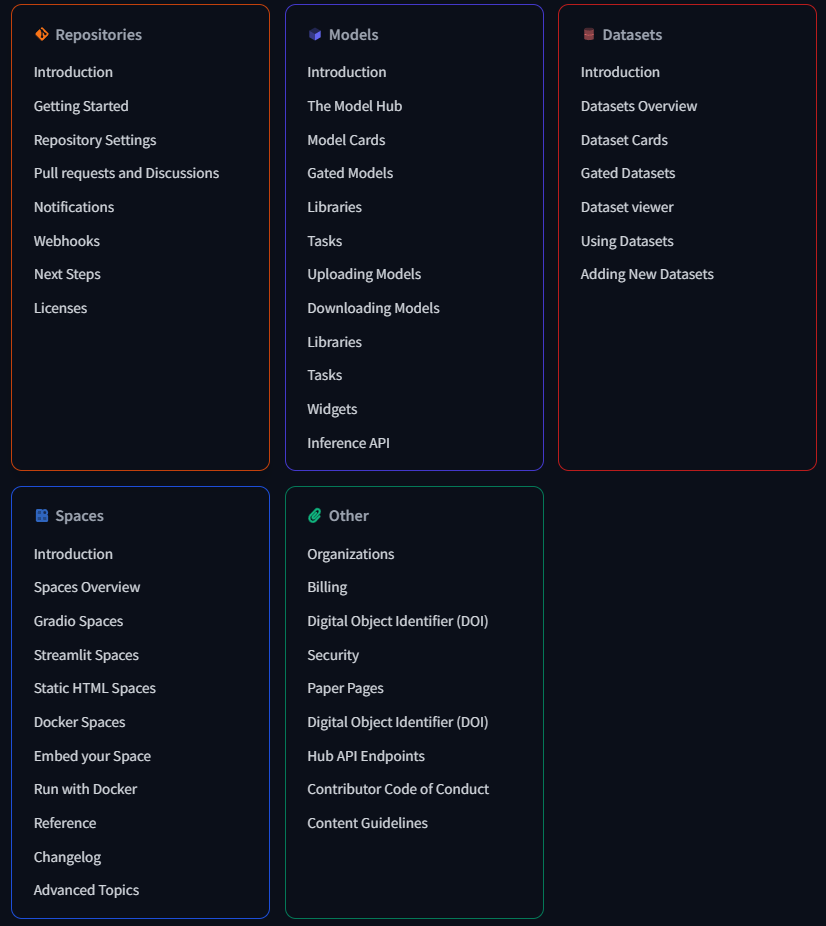

### Huggingface Hub - 2 Temel Modul
Deep Learning'i kuvvetli yapan şeylerden birisi de `Transfer Learning`'tir. 

#### Transfer Learning Nedir?
Transfer Learning, yeni ve benzer görevler için önceden eğitilmiş mevcut modelleri yeniden kullanmaya yönelik bir derin öğrenme tekniğidir. Bildiğimiz gibi, derin öğrenme modelleri veriye açtır (data hungry). Ayrıca, büyük verisetleri ile devasa modelleri eğitmek, hesaplama yapmak açısından pahalıdır. Bu nedenle, iki temel sorun vardır:

* Veri eksikliği

* Hesaplama kaynaklarının eksikliği (GPU, TPU)

Transfer Learning bu sorunları çözmeyi amaçlar. Transfer Learning yaklaşımında bazı stratejiler vardır:


1. Önceden Eğitilmiş Modeli Doğrudan Kullanmak
Bu stratejide, önceden eğitilmiş model, ancak ve ancak hedef verilerde de aynı sınıflar varsa, daha fazla eğitim süreci olmadan hedef sorunu çözebilir.

 * Örnek: State-of-the-art object detection modelleri büyük ölçekli verisetleri üzerinde eğitildiğinden doğrudan hedef probleme uygulanabilir. Bu verisetleri yüzlerce benzersiz sınıf içerdiğinden modeller yeni task için hedef sınıfları tahmin edebilecektir.

2. Önceden Eğitilmiş Modelleri Özellik Çıkarıcı (Feature Extractor) Olarak Kullanmak
Önceki örnekte olduğu gibi önceden eğitilmiş modeli doğrudan kullanmak yerine, tamamen bağlı katmanları (fully connected layer) atarak bu modeli bir özellik çıkarıcı olarak ele alabiliriz. Bu, çoğunlukla CNN'lerde kullanılan bir stratejidir. Convolution'lar sadece kayan filtreler olduğundan, görüntü boyutuyla ilgilenmediğinden (görüntü kanalları eşleşmelidir) özellik çıkarıcı gibi davranabilirler. Bu strateji, veriseti oldukça küçük olduğunda yaygın olarak kullanılır.

 * Örnek 1: ImageNet verisetinde eğitilmiş önceden eğitilmiş bir model alabilir ve convolutionların sonucunu dense layerlara aktarabiliriz. Bu, hedef görüntü/veriseti için özellikleri korurken önceden eğitilmiş ağa çıktı katmanları eklememize izin verir.

 * Örnek 2: Bir embedding sıfırdan eğitmek bazen zor olabilie. GloVe gibi önceden eğitilmiş embeddingler, bir özellik çıkarıcı işlevi görebilir.

3. Önceden Eğitilmiş Modelin Son Katmanlarını -Fine Tune- Etmek
Ayrıca mevcut modelin katmanlarında -ince ayar- yapabiliriz. Bu stratejide, önceden eğitilmiş modelin bazı katmanları dondurulur ve eğitim sırasında güncellenmez. Yani backpropagation sürecine dahil edilmezler.

 * Örnek 1: Ana modelin bir araba veriseti üzerinde eğitildiğini varsayalım ve yeni hedef veriseti arabalarla ilgi veya benzerse en son katmanlarda fine tune yapabiliriz. İlk CNN katmanları düşük seviyeli özellikleri öğreneceğinden, çoğu durumda son katmanlara ince ayar yapmak yeterlidir.

4. Başlangıç Noktası Olarak Önceden Eğitilmiş Bir Model Kullanmak
Bahsetmek istediğim son strateji, rastgele ayarlanmış ağırlıklarla başlamak yerine önceden eğitilmiş modelin ağırlıklarını bir başlangıç noktası olarak kullanmaktır. Görevler benzerse ve oldukça büyük miktarda veri varsa, bu model faydalı olabilir. Ancak katmanların hepsi eğitim sürecine dahil edileceğinden, yani eğitim sırasında hepsi yeni veri noktalarıyla güncelleneceğinden bu, hesaplama açısından yoğun olacaktır.

 * Örnek 1: Önceden eğitilmiş bir ResNet-50 CNN alınabilir ve ağırlıkları bir başlangıç noktası olarak kullanılabilir.


 Açıklamayı aldığım notebook: https://github.com/Frightera/TensorFlow-2.X-Ogretici-Notebooklar-Turkce/blob/main/4%20-%20Transfer%20Learning%20DenseNet121-%20MultiOptimizer.ipynb

4.strateji için bir örnek:

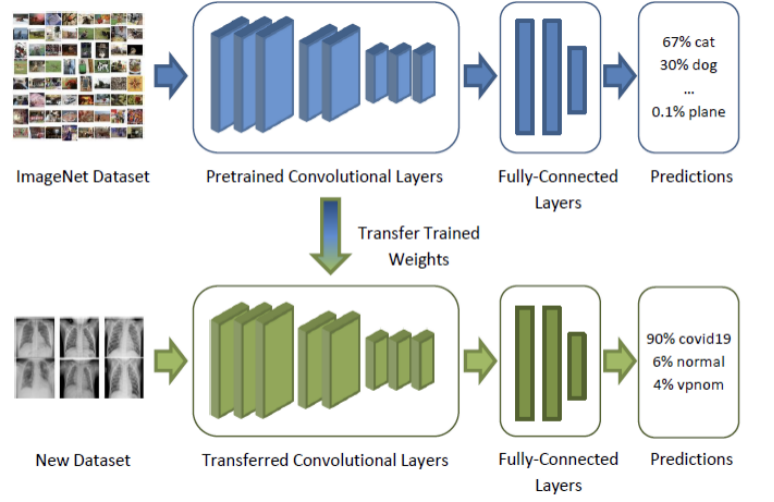

 Resim kaynak: https://dergipark.org.tr/en/pub/dubited/article/878779



---



---



#### Huggingface Hub ve Transfer Learning
Huggingface Hub içerisinde önceden train edilmiş modelleri ve örnek pipelinelarını bulabilirsiniz. 

Her task için farklı model kullanacağınız için istediğiniz modelleri filtreleyerek daha kolay bulabilirsiniz.

Solda filtreleri görebilirsiniz:
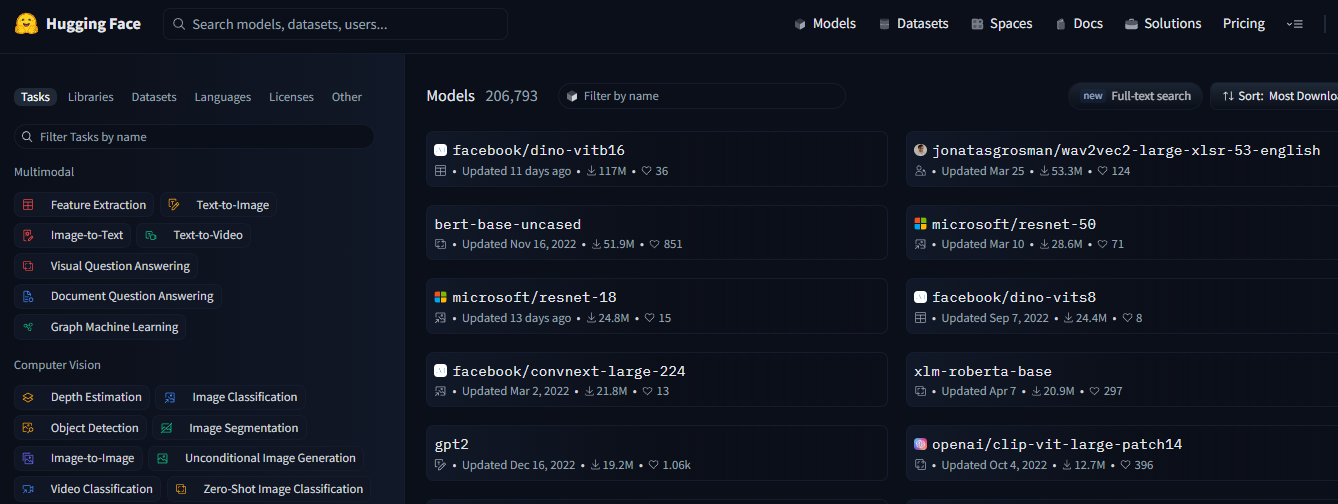

Sayfa: https://huggingface.co/models

#### Huggingface Datasets
Hazır datasetler bulabileceğiniz kısımdır. Burada dataseti yüklemekten daha çok onu işleme ve cache'e alma gibi işlemler asıl önemli olan kısımlardır. Datasetlerin nasıl çalıştığına sonraki bölümlerde değineceğiz.

Kısaca, datasetleri yükleyip standart bir formata getirmek zahmetli bir işlem olabilir. Huggingface Datasets aslında bu işlemi bizim için high level bir API ile basite indirgemiş oluyor. Yüklenen datasetler RAM'de direkt olarak tutulmuyor, bunun yerine `mmap` kullanılıyor. 

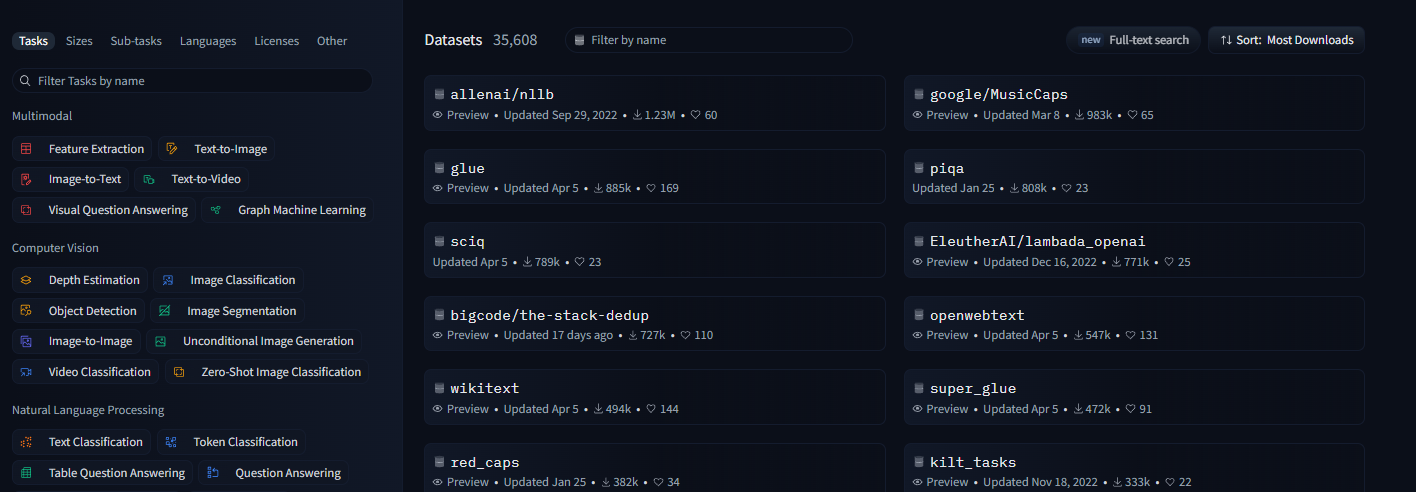

https://huggingface.co/datasets